# **Experiment 5**

## Context



This project focuses on the problems from experiment 4 and looks at whether the RandomForestClassifier can better identify customers likely to repurchase cars, using fewer resources than the DecisionTreeClassifier. It also plans to check how reducing the waste of resources affects business results in car sales.

### 0. Import Packages

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.1.1 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings

warnings.filterwarnings('ignore')

### 1. Load Dataset

In [4]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
%cd /content/gdrive/MyDrive/ColabNotebooks/UTS_III/MLAA/MLAA_AT2/

/content/gdrive/MyDrive/ColabNotebooks/UTS_III/MLAA/MLAA_AT2


In [6]:
file_url = 'repurchase_dataset.csv'

In [7]:
df = pd.read_csv(file_url)

### 2. Explore Dataset

In [8]:
df.shape #Display number of rows and cols in data

(131337, 17)

In [9]:
df.info() #Display information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

In [10]:
df.describe() # Summary

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [11]:
df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


### 3. Explore Target variable

In [12]:
target = 'Target'

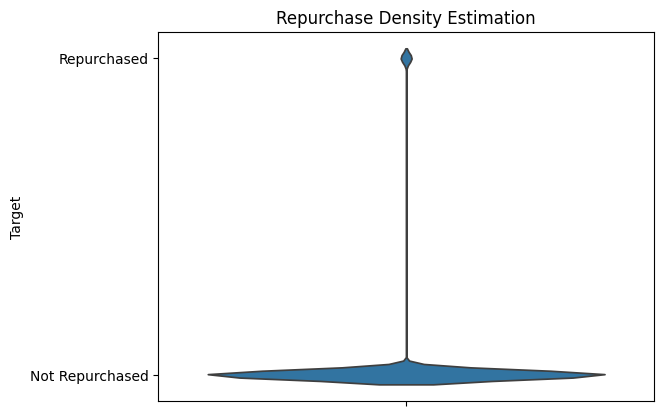

In [13]:
#Plot chart for density of Target data
sns.violinplot(y=target, data=df, inner=None)
plt.title('Repurchase Density Estimation')
plt.yticks([0, 1], labels=['Not Repurchased', 'Repurchased'])
plt.show()

### 4. Explore Variables of Interest

Text(0.5, 1.05, 'Age of Vehicle by Annualised Mileage, segmented by Car Segment')

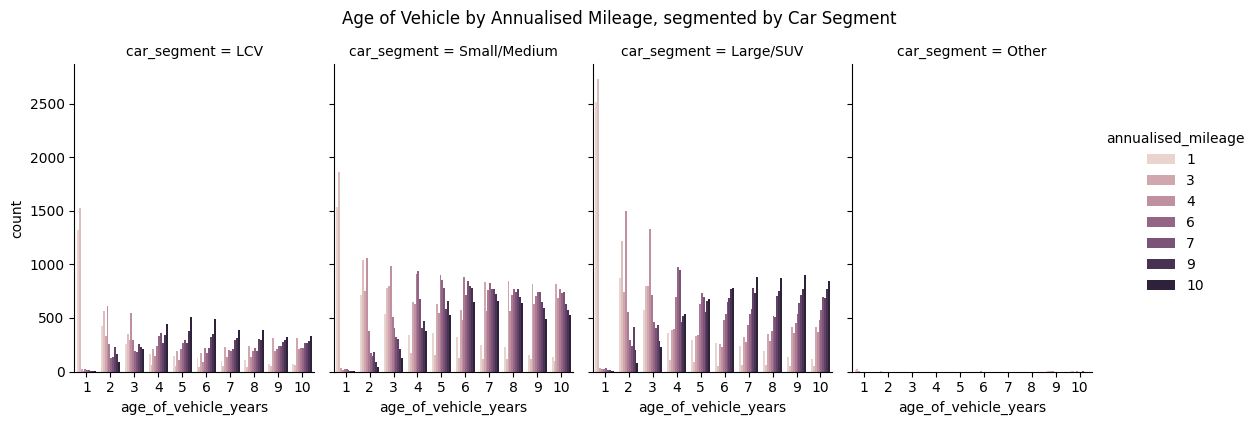

In [14]:
# Plot catplot on selected features
g = sns.catplot(x='age_of_vehicle_years', hue='annualised_mileage', col='car_segment',
                data=df, kind='count', height=4, aspect=.7)
g.fig.suptitle('Age of Vehicle by Annualised Mileage, segmented by Car Segment', y=1.05)

In [15]:
cat_cols = ['gender', 'age_band', 'car_model', 'car_segment'] #List all categorical variables in data

In [16]:
#Display categorical columns and their unique values
for cols in cat_cols:
  print(cols)
  print(df[cols].unique())

gender
['Male' nan 'Female']
age_band
['3. 35 to 44' nan '1. <25' '4. 45 to 54' '2. 25 to 34' '7. 75+'
 '5. 55 to 64' '6. 65 to 74']
car_model
['model_1' 'model_2' 'model_3' 'model_5' 'model_6' 'model_4' 'model_7'
 'model_8' 'model_9' 'model_10' 'model_11' 'model_13' 'model_12'
 'model_14' 'model_15' 'model_16' 'model_17' 'model_18' 'model_19']
car_segment
['LCV' 'Small/Medium' 'Large/SUV' 'Other']


In [17]:
ord_cols = [x for x in df.columns if df[x].dtype=='int' and x not in ['ID', 'Target']] #Create a list of ordinal categorical values

In [18]:
#Display ordinal categorical columns and their unique values
for cols in ord_cols:
  print(cols)
  print(df[cols].unique())

age_of_vehicle_years
[ 9  6  5  8  7  1  3  4 10  2]
sched_serv_warr
[ 2 10  8  9  4  1  3  7  5  6]
non_sched_serv_warr
[10  3  9  5  4  8  1  6  2  7]
sched_serv_paid
[ 3 10  8  5  2  6  1  4  9  7]
non_sched_serv_paid
[ 7  4  9  3  1  2  6  5 10  8]
total_paid_services
[ 5  9 10  6  8  1  2  7  3  4]
total_services
[ 6 10  8  4  2  1  3  5  9  7]
mth_since_last_serv
[ 9  6  7  4  5  8  1  3 10  2]
annualised_mileage
[ 8 10  4  5  6  1  7  3  9  2]
num_dealers_visited
[10  7  6  9  4  5  2  1  3  8]
num_serv_dealer_purchased
[ 4 10  7  9  8  3  1  6  2  5]


In [19]:
def plot_corr(df):
  corr = df.corr()

  plt.figure(figsize=(10,8))
  sns.heatmap(corr, annot=True)
  plt.title('Correlation between the features')
  plt.show()

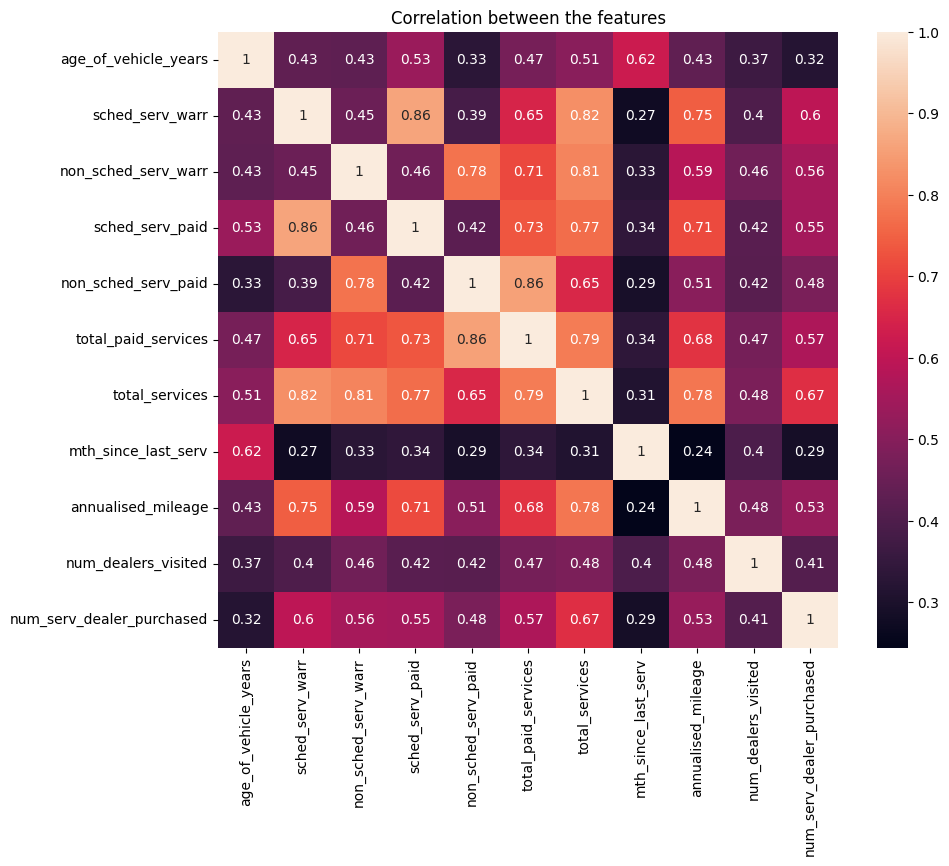

In [20]:
plot_corr(df[ord_cols])

### 5. Prepare Data

In [21]:
df_cleaned = df.copy()

In [22]:
#  Drop the identifier
df_cleaned.drop(['ID'], axis=1, inplace=True)

In [23]:
# Filling Missing values
df_cleaned.gender.fillna('Not Specified', inplace=True)
df_cleaned.age_band.fillna('Not Specified', inplace=True)

In [24]:
df_cleaned.duplicated().sum() #check duplicates

2726

In [25]:
#Drop duplicates
df_cleaned.drop_duplicates(inplace=True)

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers = [
        ('ord', StandardScaler(), ord_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ]
)

### 6. Split Dataset

In [27]:
y = df_cleaned.pop(target)
X = df_cleaned

In [28]:
from sklearn.model_selection import train_test_split

X_data, X_test, y_data, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, stratify=y_data, random_state=42, test_size=0.2)

### 7. Baseline Model

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Create a pipeline
model0 = Pipeline([
    ('preprocessing', preprocessor),
    ('model', DecisionTreeClassifier(max_depth=10))
])

In [ ]:
model0.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ord', StandardScaler(),
                                                  ['age_of_vehicle_years',
                                                   'sched_serv_warr',
                                                   'non_sched_serv_warr',
                                                   'sched_serv_paid',
                                                   'non_sched_serv_paid',
                                                   'total_paid_services',
                                                   'total_services',
                                                   'mth_since_last_serv',
                                                   'annualised_mileage',
                                                   'num_dealers_visited',
                                                   'num_serv_dealer_purchased']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender', 'age_band',
                                                   'car_model',
                                                   'car_segment'])])),
                ('model', DecisionTreeClassifier(max_depth=10))])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculating performance on DecisionTree
train_perf = classification_report(y_train, model0.predict(X_train))
val_perf = model0.score(X_val, y_val)
test_perf = model0.score(X_test, y_test)

In [ ]:
print(train_perf)
print(f"Validation Accuracy: {val_perf:.2%},\
      Test Accuracy: {test_perf:.2%}")

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     80056
           1       0.95      0.81      0.87      2254

    accuracy                           0.99     82310
   macro avg       0.97      0.90      0.94     82310
weighted avg       0.99      0.99      0.99     82310

Validation Accuracy: 98.93%,      Test Accuracy: 98.97%


### 8. Train Machine Learning Model

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Creating a pipeline for RandomForest
pipeline_1 = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier())
])

In [32]:
from scipy.stats import randint

# defining parameters for RandomizedSearch
param_r = {
    'model__max_depth': randint(1, 20),
    'model__min_samples_split': randint(1, 200),
    'model__min_samples_leaf': randint(1, 100),
    'model__max_features': ['sqrt', 'log2', None],
    'model__n_estimators': randint(5, 200),
    'model__max_leaf_nodes': randint(5, 200)
}

In [33]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Cross Validation
skf = StratifiedKFold(n_splits=3)

# RadomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline_1,
    param_r,
    cv=skf,
)

In [34]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('ord',
                                                                               StandardScaler(),
                                                                               ['age_of_vehicle_years',
                                                                                'sched_serv_warr',
                                                                                'non_sched_serv_warr',
                                                                                'sched_serv_paid',
                                                                                'non_sched_serv_paid',
                                                                                'total_paid_services',
                                                                                'total_services',
                                                                                'mth_since_last_serv',
                                                                                'ann...
                                        'model__max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b19d677e5f0>,
                                        'model__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b19d677fe80>,
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b19d677e650>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b19d677ff70>})

In [37]:
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [ ]:
# Display best fit for the model
random_search.best_params_

{'model__max_depth': 16,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': 102,
 'model__min_samples_leaf': 17,
 'model__min_samples_split': 32,
 'model__n_estimators': 76}

In [36]:
# Creating the best estimating model for RandomForest
model = random_search.best_estimator_

### 9. Access Model Performance

In [ ]:
y_preds = model.predict(X_train)

In [ ]:
print(classification_report(y_train, y_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     80056
           1       0.98      0.43      0.60      2254

    accuracy                           0.98     82310
   macro avg       0.98      0.71      0.79     82310
weighted avg       0.98      0.98      0.98     82310



In [ ]:
print(f"Validation Accuracy: {model.score(X_val, y_val):.2%},\
      Test Accuracy: {model.score(X_val, y_val):.2%}")

Validation Accuracy: 98.38%,      Test Accuracy: 98.38%


In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, roc_curve, roc_auc_score

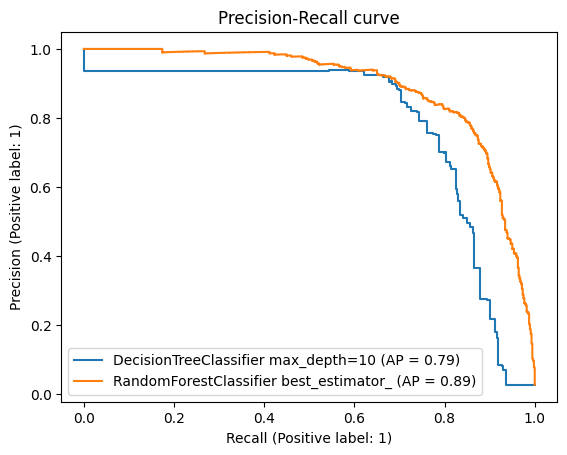

In [ ]:
# Plot the precision recall curve
display = PrecisionRecallDisplay.from_estimator(model0, X_val, y_val, name='DecisionTreeClassifier max_depth=10')
display1 = PrecisionRecallDisplay.from_estimator(model, X_val, y_val, ax=display.ax_, name='RandomForestClassifier best_estimator_')
display.ax_.set_title('Precision-Recall curve')
plt.show()

In [ ]:
# probabilities for each model
y_probs = model0.predict_proba(X_test)[:, 1]
y_probs1 = model.predict_proba(X_test)[:, 1]

In [ ]:
# ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs1)

In [ ]:
# AUC scores
auc = roc_auc_score(y_test, y_probs)
auc1 = roc_auc_score(y_test, y_probs1)

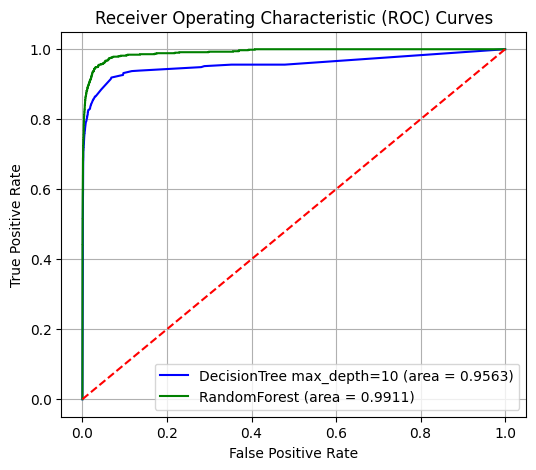

In [ ]:
# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'DecisionTree max_depth=10 (area = {auc:.4f})')
plt.plot(fpr1, tpr1, color='green', label=f'RandomForest (area = {auc1:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

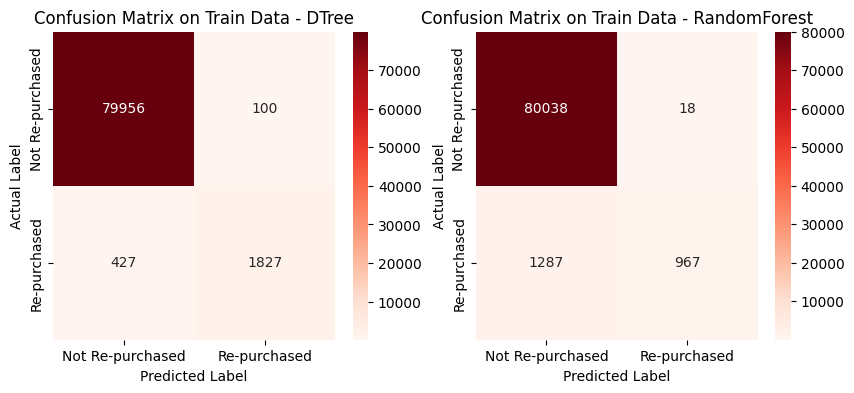

In [ ]:
# Comparison of cofusion matrix between 2 models
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# DecisionTree model
sns.heatmap(
    confusion_matrix(y_train, model0.predict(X_train)),
    annot=True,
    fmt="d",
    cmap="Reds",
    xticklabels=["Not Re-purchased", "Re-purchased"],
    yticklabels=["Not Re-purchased", "Re-purchased"],
    ax=axes[0]
)
axes[0].set_ylabel('Actual Label')
axes[0].set_xlabel('Predicted Label')
axes[0].set_title('Confusion Matrix on Train Data - DTree')

# RandomForest model
sns.heatmap(
    confusion_matrix(y_train, model.predict(X_train)),
    annot=True,
    fmt="d",
    cmap="Reds",
    xticklabels=["Not Re-purchased", "Re-purchased"],
    yticklabels=["Not Re-purchased", "Re-purchased"],
    ax=axes[1]
)
axes[1].set_ylabel('Actual Label')
axes[1].set_xlabel('Predicted Label')
axes[1].set_title('Confusion Matrix on Train Data - RandomForest')
plt.show()

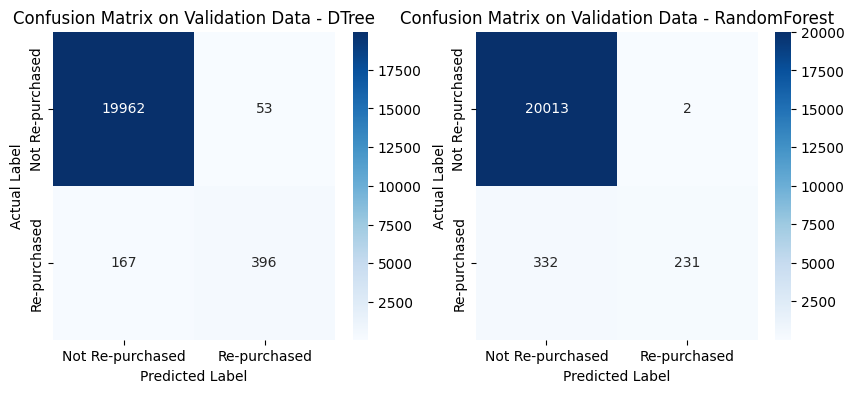

In [ ]:
# Comparison of cofusion matrix between 2 models (Validation)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# DecisionTree model
sns.heatmap(
    confusion_matrix(y_val, model0.predict(X_val)),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Re-purchased", "Re-purchased"],
    yticklabels=["Not Re-purchased", "Re-purchased"],
    ax=axes[0]
)
axes[0].set_ylabel('Actual Label')
axes[0].set_xlabel('Predicted Label')
axes[0].set_title('Confusion Matrix on Validation Data - DTree')

# RandomForest model
sns.heatmap(
    confusion_matrix(y_val, model.predict(X_val)),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Re-purchased", "Re-purchased"],
    yticklabels=["Not Re-purchased", "Re-purchased"],
    ax=axes[1]
)
axes[1].set_ylabel('Actual Label')
axes[1].set_xlabel('Predicted Label')
axes[1].set_title('Confusion Matrix on Validation Data - RandomForest')
plt.show()

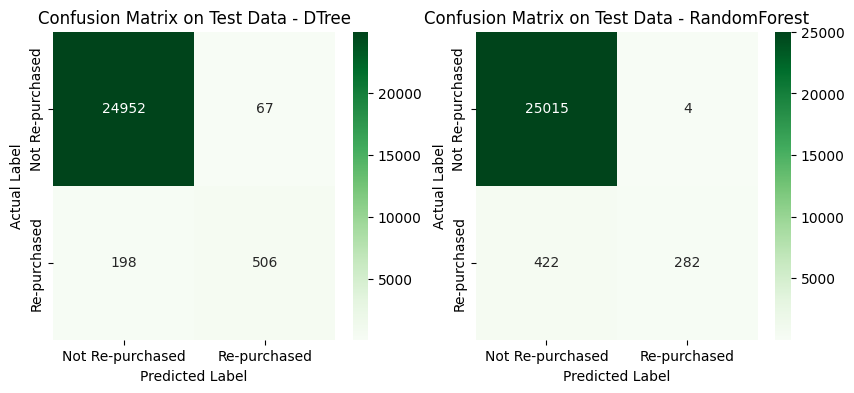

In [ ]:
# Comparison of cofusion matrix between 2 models (Test)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# DecisionTree model
sns.heatmap(
    confusion_matrix(y_test, model0.predict(X_test)),
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Not Re-purchased", "Re-purchased"],
    yticklabels=["Not Re-purchased", "Re-purchased"],
    ax=axes[0]
)
axes[0].set_ylabel('Actual Label')
axes[0].set_xlabel('Predicted Label')
axes[0].set_title('Confusion Matrix on Test Data - DTree')

# RandomForest model
sns.heatmap(
    confusion_matrix(y_test, model.predict(X_test)),
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Not Re-purchased", "Re-purchased"],
    yticklabels=["Not Re-purchased", "Re-purchased"],
    ax=axes[1]
)
axes[1].set_ylabel('Actual Label')
axes[1].set_xlabel('Predicted Label')
axes[1].set_title('Confusion Matrix on Test Data - RandomForest')
plt.show()